In [42]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [43]:
# standard libraries
import pandas as pd
import numpy as np
import os
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

# datetime for manipulating date and time
import datetime

# statsmodels for autoregressive models
import statsmodels.tsa.ar_model as AutoReg

# scipy
import scipy.stats as stats
from scipy.stats import uniform, randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

random.seed(2)

In [2]:
df_features = pd.read_csv("../../notebooks/lle/features_algorithm.csv")
df_features.head()

,Unnamed: 0,number,madrs2_grouped,madrs2_grouped_ord,Normal,Mild,Moderate,activity_intraday_variability,activity_mean,activity_cv_minutely,...,act_bout_num,act_bout_dur_mean,act_bout_dur_std,act_bout_dur_cv,act_bout_dur_skew,act_bout_dur_entropy,inact_bout_dur_mean,inact_bout_dur_cv,inact_bout_dur_skew,inact_bout_dur_entropy
0,45,control_3,Normal,0,1,0,0,450.847169,251.233880,1.409631,...,36.666667,16.975000,17.689084,1.042067,2.667753,5.687968,31.866667,3.549919,7.853831,4.095484
1,33,control_19,Normal,0,1,0,0,497.025070,226.506920,1.504780,...,36.384615,13.955603,15.838704,1.134935,3.636279,5.738435,28.545679,2.372276,4.508271,4.832628
2,40,control_25,Normal,0,1,0,0,578.504177,316.378243,1.353900,...,30.461538,25.111111,75.382117,3.001943,16.823950,5.101094,29.782738,2.313598,4.512948,4.707541
3,26,control_12,Normal,0,1,0,0,341.117566,147.202370,1.597837,...,28.285714,12.378788,14.921837,1.205436,4.124580,5.541758,36.585082,2.519433,9.393374,4.984534
4,11,condition_2,Mild,1,0,1,0,566.183307,211.694251,1.773271,...,32.055556,15.303293,61.551835,4.022130,21.570781,5.341824,34.537698,2.350872,4.200135,4.979392


## Preprocessing

In [3]:
#extract indices
indices = np.arange(df_features.shape[0])
#shuffle indices
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)
#reindex the shuffle indices
df_features = df_features.reindex(shuffled_indices)
display(df_features)

,Unnamed: 0,number,madrs2_grouped,madrs2_grouped_ord,Normal,Mild,Moderate,activity_intraday_variability,activity_mean,activity_cv_minutely,...,act_bout_num,act_bout_dur_mean,act_bout_dur_std,act_bout_dur_cv,act_bout_dur_skew,act_bout_dur_entropy,inact_bout_dur_mean,inact_bout_dur_cv,inact_bout_dur_skew,inact_bout_dur_entropy
45,36,control_21,Normal,0,1,0,0,501.256833,264.990354,1.390468,...,38.750000,15.570968,20.479364,1.315227,5.337884,5.238865,21.813880,2.368584,5.583540,4.729848
33,13,condition_21,Moderate,2,0,0,1,581.136493,79.936852,2.697304,...,17.923077,9.236052,9.194736,0.995527,2.322436,5.096657,64.707143,2.424348,4.328888,4.389412
40,12,condition_20,Moderate,2,0,0,1,375.133788,69.371695,2.351840,...,16.153846,7.628571,5.674179,0.743806,2.332610,5.132767,46.642857,1.954293,4.103701,5.017741
26,5,condition_14,Mild,1,0,1,0,415.016644,75.205611,2.487839,...,19.000000,7.894737,7.177810,0.909189,4.969473,5.324928,47.501312,1.585688,5.739879,5.259853
11,10,condition_19,Moderate,2,0,0,1,514.936507,165.284240,1.766114,...,33.461538,10.245977,11.835146,1.155102,3.084005,5.645285,29.305439,2.279229,4.874779,5.136790
2,40,control_25,Normal,0,1,0,0,578.504177,316.378243,1.353900,...,30.461538,25.111111,75.382117,3.001943,16.823950,5.101094,29.782738,2.313598,4.512948,4.707541
32,8,condition_17,Mild,1,0,1,0,280.946142,86.749194,1.795802,...,22.692308,11.037288,72.976806,6.611842,17.084481,4.050248,39.730310,2.243364,4.879217,5.030853
43,6,condition_15,Mild,1,0,1,0,446.762140,117.579443,2.027575,...,23.769231,10.097087,10.989234,1.088357,3.596046,5.359727,38.069307,2.371731,4.677363,4.865471
46,21,condition_8,Mild,1,0,1,0,702.131570,218.154069,1.942973,...,31.400000,14.133758,18.433907,1.304247,2.852017,4.502515,39.200000,1.957940,3.703643,4.016461
30,20,condition_7,Moderate,2,0,0,1,651.798586,322.489322,1.511731,...,26.000000,21.104895,50.033913,2.370726,5.344657,4.613154,36.039735,3.064516,8.197120,4.311731


In [4]:
#drop unnecesarry column
df_depression = df_features.drop(['number',
                  'madrs2_grouped_ord',
                  'Normal',
                  'Mild',
                  'Moderate'
                  ], axis=1)
df_depression.head(5)

,Unnamed: 0,madrs2_grouped,activity_intraday_variability,activity_mean,activity_cv_minutely,activity_skewness_hourly,activity_entropy_hourly,activity_pct_0to6,activity_pct_6to12,activity_pct_12to18,...,act_bout_num,act_bout_dur_mean,act_bout_dur_std,act_bout_dur_cv,act_bout_dur_skew,act_bout_dur_entropy,inact_bout_dur_mean,inact_bout_dur_cv,inact_bout_dur_skew,inact_bout_dur_entropy
45,36,Normal,501.256833,264.990354,1.390468,2.319655,3.017930,0.285579,0.225209,0.349568,...,38.750000,15.570968,20.479364,1.315227,5.337884,5.238865,21.813880,2.368584,5.583540,4.729848
33,13,Moderate,581.136493,79.936852,2.697304,3.787372,2.147124,0.025093,0.400688,0.444788,...,17.923077,9.236052,9.194736,0.995527,2.322436,5.096657,64.707143,2.424348,4.328888,4.389412
40,12,Moderate,375.133788,69.371695,2.351840,3.688455,2.148713,0.055103,0.343435,0.420807,...,16.153846,7.628571,5.674179,0.743806,2.332610,5.132767,46.642857,1.954293,4.103701,5.017741
26,5,Mild,415.016644,75.205611,2.487839,3.412524,2.284191,0.311458,0.532379,0.269847,...,19.000000,7.894737,7.177810,0.909189,4.969473,5.324928,47.501312,1.585688,5.739879,5.259853
11,10,Moderate,514.936507,165.284240,1.766114,2.869305,2.801761,0.043608,0.348435,0.451102,...,33.461538,10.245977,11.835146,1.155102,3.084005,5.645285,29.305439,2.279229,4.874779,5.136790


In [5]:
#mapping Y labels to numbers
mapping = {'Normal': 0, 'Mild': 1, 'Moderate': 2}
df_depression = df_depression.replace({'madrs2_grouped':mapping})
label_names = ['Normal', 'Mild', 'Moderate']
df_depression.head(5)

,Unnamed: 0,madrs2_grouped,activity_intraday_variability,activity_mean,activity_cv_minutely,activity_skewness_hourly,activity_entropy_hourly,activity_pct_0to6,activity_pct_6to12,activity_pct_12to18,...,act_bout_num,act_bout_dur_mean,act_bout_dur_std,act_bout_dur_cv,act_bout_dur_skew,act_bout_dur_entropy,inact_bout_dur_mean,inact_bout_dur_cv,inact_bout_dur_skew,inact_bout_dur_entropy
45,36,0,501.256833,264.990354,1.390468,2.319655,3.017930,0.285579,0.225209,0.349568,...,38.750000,15.570968,20.479364,1.315227,5.337884,5.238865,21.813880,2.368584,5.583540,4.729848
33,13,2,581.136493,79.936852,2.697304,3.787372,2.147124,0.025093,0.400688,0.444788,...,17.923077,9.236052,9.194736,0.995527,2.322436,5.096657,64.707143,2.424348,4.328888,4.389412
40,12,2,375.133788,69.371695,2.351840,3.688455,2.148713,0.055103,0.343435,0.420807,...,16.153846,7.628571,5.674179,0.743806,2.332610,5.132767,46.642857,1.954293,4.103701,5.017741
26,5,1,415.016644,75.205611,2.487839,3.412524,2.284191,0.311458,0.532379,0.269847,...,19.000000,7.894737,7.177810,0.909189,4.969473,5.324928,47.501312,1.585688,5.739879,5.259853
11,10,2,514.936507,165.284240,1.766114,2.869305,2.801761,0.043608,0.348435,0.451102,...,33.461538,10.245977,11.835146,1.155102,3.084005,5.645285,29.305439,2.279229,4.874779,5.136790


In [6]:
# split data
X = np.array(df_depression.iloc[:, 2:])
y = np.array(df_depression.iloc[:, 1])


# create samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=1, stratify=y)
print('Shape X_train: ', X_train.shape, '\nShape X_test: ', X_test.shape,
      '\nShape y_train: ', y_train.shape, '\nShape y_test:', y_test.shape)

Shape X_train:  (44, 19) 
Shape X_test:  (11, 19) 
Shape y_train:  (44,) 
Shape y_test: (11,)


In [7]:
sc = StandardScaler() 
# estimate the sample mean and standard deviation for each feature in X_train
sc.fit(X_train)

# use the two parameters to standardize both X_train and X_test
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Logistic Regression

In [8]:
def build_model(n_classes = 3, learning_rate=0.01):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of classes in the dataset
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(
      units=n_classes,
      use_bias=True,
      activation='softmax'
  ))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer=optimizer, 
                metrics=['accuracy'])
  return model

In [9]:
model = build_model(3,0.01)

hist = model.fit(
  x = X_train_std,
  y = y_train,
  epochs=30,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

history = pd.DataFrame(hist.history)
display(history)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 1.3688 - accuracy: 0.4103

2023-07-09 14:51:46.950899: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 260ms/step - loss: 1.3688 - accuracy: 0.4103 - val_loss: 1.6433 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 12ms/step - loss: 1.3039 - accuracy: 0.4103 - val_loss: 1.5301 - val_accuracy: 0.2000
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 1.2444 - accuracy: 0.4359 - val_loss: 1.4273 - val_accuracy: 0.2000
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 1.1902 - accuracy: 0.4615 - val_loss: 1.3339 - val_accuracy: 0.2000
Epoch 5/30
1/1 [==============================] - 0s 13ms/step - loss: 1.1412 - accuracy: 0.4615 - val_loss: 1.2494 - val_accuracy: 0.4000
Epoch 6/30
1/1 [==============================] - 0s 12ms/step - loss: 1.0972 - accuracy: 0.5128 - val_loss: 1.1732 - val_accuracy: 0.4000
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 1.0578 - accuracy: 0.5385 - val_loss: 1.1048 - val_accuracy: 0.4000
Epoch 8/30
1/1 [=================

,loss,accuracy,val_loss,val_accuracy
0,1.368817,0.410256,1.643303,0.0
1,1.303927,0.410256,1.530076,0.2
2,1.244397,0.435897,1.427275,0.2
3,1.190194,0.461538,1.333935,0.2
4,1.141212,0.461538,1.249409,0.4
5,1.097211,0.512821,1.173156,0.4
6,1.057843,0.538462,1.104762,0.4
7,1.022673,0.538462,1.043810,0.4
8,0.991216,0.564103,0.989828,0.4
9,0.962989,0.564103,0.942282,0.4


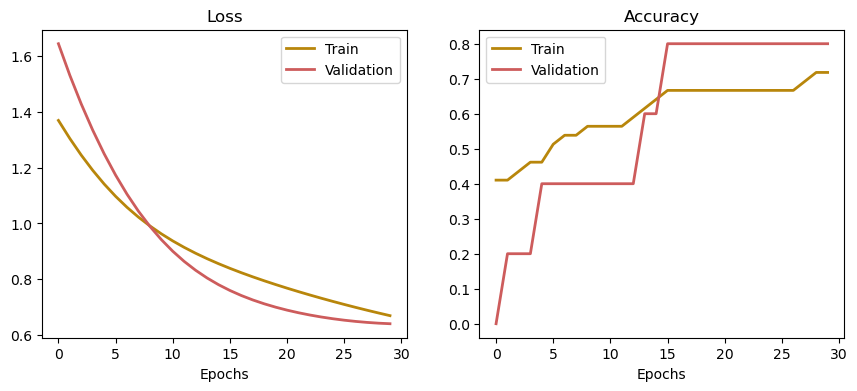

In [10]:
# grab history
history = hist.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

1/1 [==============================] - 0s 40ms/step
[2 1 2 0 0 0 2 0 0 0 0]


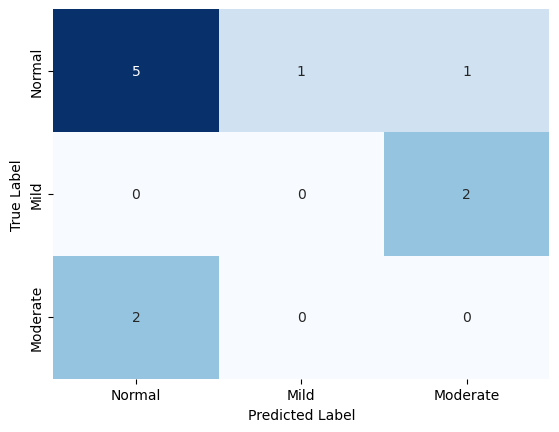

In [11]:
#Evaluation
test_predictions = np.argmax(model.predict(X_test_std), axis=-1)
print(test_predictions)

# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [12]:
#calculate precision for each class
for i,val in enumerate(label_names):
    precision = 100* confusion_matrix[i,i] / np.sum(confusion_matrix[:,i])
    print(val, "precision:", precision)

Normal precision: tf.Tensor(71.42857142857143, shape=(), dtype=float64)
Mild precision: tf.Tensor(0.0, shape=(), dtype=float64)
Moderate precision: tf.Tensor(0.0, shape=(), dtype=float64)


## Adaboost

The initial formulation of the boosting algorithm (4 key steps):<br>
 1. Draw a random sample of training examples, 𝑑𝑑1, without
replacement from the training dataset, D, to train a weak learner, 𝐶𝐶1.
 2. Draw a second random sample of training examples, 𝑑𝑑2, without replacement from the
training dataset and add 50 percent of the examples that were previously
misclassified to train a weak learner, 𝐶𝐶2.
 3. Find the training examples, 𝑑𝑑3, in the training dataset, D, which 𝐶𝐶1 and 𝐶𝐶2
disagree upon, to train a third weak learner, 𝐶𝐶3.
 4. Combine the weak learners 𝐶𝐶1, 𝐶𝐶2, and 𝐶𝐶3 via majority voting.

    

How is AdaBoost different (see Sebastian's book, pp. 250-257):
* uses all the training examples to train the weak learners
* the training examples are reweighed in each iteration

In [13]:
#Train a stump decision tree 
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1)

In [14]:
#Use the stump decision tree as the base clasifier, and create an ensemble of 500 stump decision trees 
#fit on different bootsrap sambles of the training dataset (w/o replacement).
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500)

In [15]:
#Perform and evaluate the algorithm
ada = ada.fit(X_train_std, y_train)
y_train_pred = ada.predict(X_train_std)
y_test_pred = ada.predict(X_test_std)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost train/test accuracies 0.841/0.455


Logistic regression has lower training accuracy than Adaboost (0.8<0.841) but higher testing accuracy(0.54>0.455). This shows Adaboost is overfitting.

## XGBoost

AdaBoost and gradient boosting share the main overall concept: boosting weak learners (such as decision tree stumps) to strong learners. The two approaches, adaptive and gradient boosting, differ mainly with regard to how the weights are updated and how the (weak) classifiers are combined. XGBoost is an optimized gradient boosting

In gradient boosting, the trees are built in a sequential manner such that each subsequent tree aims to reduce the errors of the previous tree. The misclassified labels are given higher weights. Each tree learns from its predecessors and tries to reduce the residual errors. So, the tree next in sequence will learn from the previous tree residuals.

In XGBoost, we try to fit a model on the gradient of the loss function generated from the previous step. So, in XGBoost we modified our gradient boosting algorithm so that it works with any differentiable loss function.

https://gist.github.com/pb111/cc341409081dffa5e9eaf60d79562a03

https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn

In [16]:
# declare parameters
params = {
            'objective':'multi:softprob',
            'use_label_encoder':'False'
            #'max_depth': 4,
            #'alpha': 10,
            #'learning_rate': 1.0,
            #'n_estimators':100
        }
# instantiate the classifier 
xgb_clf = xgb.XGBClassifier(**params)
print(xgb_clf)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, use_label_encoder='False',
              validate_parameters=None, verbosity=None)


In [17]:
#Perform and evaluate the algorithm
xg = xgb_clf.fit(X_train_std, y_train)
y_train_pred = xg.predict(X_train_std)
y_test_pred = xg.predict(X_test_std)

xg_train = accuracy_score(y_train, y_train_pred) 
xg_test = accuracy_score(y_test, y_test_pred) 
print('XGBoost train/test accuracies %.3f/%.3f'
      % (xg_train, xg_test))

[14:52:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost train/test accuracies 1.000/0.455


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [32]:
# Hyperparameter tuning
xgb_model = xgb.XGBClassifier()

params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    'use_label_encoder':'False',
    "subsample": uniform(0.6, 0.4)
}


search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=10, cv=5)

search.fit(X_train_std, y_train)

/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nhanle/miniforge3/envs/w207_final/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.19123099563358137, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.32496926574203644,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=102, n_jobs=8,
              num_parallel_tree=1, objective='m

In [33]:
best_rf = search.best_estimator_
print(best_rf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.19123099563358137, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.32496926574203644,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=102, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.9439761626945282, tree_method='exact',
              use_label_encoder='e', validate_parameters=1, verbosity=None)


## Random Forest

Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 

In [38]:
# declare parameters
params = {
            'objective':'multi:softprob',
            'use_label_encoder':'False'
            #'max_depth': 4,
            #'alpha': 10,
            #'learning_rate': 1.0,
            #'n_estimators':100
        }
# instantiate the classifier 
rf_clf = RandomForestClassifier()

In [39]:
#Perform and evaluate the algorithm
rf = rf_clf.fit(X_train_std, y_train)
y_train_pred = rf.predict(X_train_std)
y_test_pred = rf.predict(X_test_std)

rf_train = accuracy_score(y_train, y_train_pred) 
rf_test = accuracy_score(y_test, y_test_pred) 
print('Random Forest train/test accuracies %.3f/%.3f'
      % (rf_train, rf_test))

Random Forest train/test accuracies 1.000/0.545
